# TFT Match Analysis: Statistical Investigation

## Research Questions
1. **RQ1**: Does inno#ella's placement distribution differ from random expectation?
2. **RQ2**: Are specific traits significantly associated with Top-4 achievement?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [4]:
df = pd.read_csv("INNO-TFT-Dataset.csv")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Dataset shape: (200, 19)
Columns: ['match_id', 'game_datetime', 'game_length', 'game_version', 'queue_id', 'tft_game_type', 'tft_set_core_name', 'tft_set_number', 'placement', 'level', 'gold_left', 'last_round', 'players_eliminated', 'time_eliminated', 'total_damage_to_players', 'win', 'companion', 'traits', 'units']


,match_id,game_datetime,game_length,game_version,queue_id,tft_game_type,tft_set_core_name,tft_set_number,placement,level,gold_left,last_round,players_eliminated,time_eliminated,total_damage_to_players,win,companion,traits,units
0,SG2_134110128,1.770660e+12,2259.656250,Linux Version 16.3.744.7656 (Feb 06 2026/10:38...,1100,standard,TFTSet16,16,5,9,1,33,2,2003.823486,101,False,{'content_ID': 'b3368207-0065-48e6-a909-0ab69d...,"TFT16_AurelionSolUnique(units=1,style=3,tier=1...",TFT16_Neeko(tier=2)[items=][itemNames=]; TFT16...
1,SG2_133989965,1.770630e+12,2351.530029,Linux Version 16.3.744.7656 (Feb 06 2026/10:38...,1100,standard,TFTSet16,16,4,8,38,31,1,1921.549805,87,True,{'content_ID': 'b3368207-0065-48e6-a909-0ab69d...,"TFT16_AurelionSolUnique(units=1,style=3,tier=1...",TFT16_Neeko(tier=2)[items=][itemNames=]; TFT16...
2,SG2_133870769,1.770570e+12,2174.458984,Linux Version 16.3.744.7656 (Feb 06 2026/10:38...,1100,standard,TFTSet16,16,1,9,2,38,4,2166.248047,184,True,{'content_ID': 'b3368207-0065-48e6-a909-0ab69d...,"TFT16_Blacksmith(units=1,style=3,tier=1/1); TF...",TFT16_Viego(tier=3)[items=][itemNames=TFT_Item...
3,SG2_133864702,1.770570e+12,2127.833740,Linux Version 16.3.744.7656 (Feb 06 2026/10:38...,1100,standard,TFTSet16,16,8,8,50,20,0,1153.692993,0,False,{'content_ID': 'b3368207-0065-48e6-a909-0ab69d...,"TFT16_Bilgewater(units=1,style=0,tier=0/4); TF...",TFT16_Shen(tier=2)[items=][itemNames=]; TFT16_...
4,SG2_133859591,1.770570e+12,2234.131836,Linux Version 16.3.744.7656 (Feb 06 2026/10:38...,1100,standard,TFTSet16,16,8,7,57,21,0,1229.684082,0,False,{'content_ID': 'b3368207-0065-48e6-a909-0ab69d...,"TFT16_Defender(units=1,style=0,tier=0/3); TFT1...",TFT16_Qiyana(tier=2)[items=][itemNames=]; TFT1...


In [5]:
# Create binary outcome variables
df["top4"] = (df["placement"] <= 4).astype(int)
df["win"] = (df["placement"] == 1).astype(int)

print(f"Total matches: {len(df)}")
print(f"Win rate: {df['win'].mean():.1%}")
print(f"Top-4 rate: {df['top4'].mean():.1%}")
print(f"Mean placement: {df['placement'].mean():.2f}")
print(f"Std dev placement: {df['placement'].std():.2f}")

Total matches: 200
Win rate: 22.5%
Top-4 rate: 51.0%
Mean placement: 4.43
Std dev placement: 2.57


# RQ1: Placement Distribution Analysis

In [6]:
# RQ1: Chi-square goodness-of-fit test
placement_counts = df['placement'].value_counts().sort_index()
expected_freq = [len(df) / 8] * 8

# Perform chi-square goodness-of-fit test
chi2_stat, p_value = chi2_contingency(np.array([placement_counts.values])[:, :8])[0], chi2_contingency(np.array([placement_counts.values])[:, :8])[1]

# Manual chi-square calculation
chi2_contributions = (placement_counts.values - expected_freq) ** 2 / expected_freq
chi2_stat = chi2_contributions.sum()
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"p-value (approximate): < 0.0001")
print(f"\nDecision: REJECT H0 - Placement distribution differs significantly from random")

Chi-square statistic: 32.2400
p-value (approximate): < 0.0001

Decision: REJECT H0 - Placement distribution differs significantly from random


In [7]:
# RQ1: Placement frequency table
rq1_table = pd.DataFrame({
    'Placement': range(1, 9),
    'Count': [placement_counts.get(i, 0) for i in range(1, 9)],
    'Observed %': [(placement_counts.get(i, 0) / len(df) * 100) for i in range(1, 9)],
    'Expected %': [12.5] * 8
})

print("\nPlacement Frequency Distribution:")
print(rq1_table.to_string(index=False))

print(f"\nPerformance vs Random:")
print(f"Win Rate (1st place): {df['win'].mean():.1%} (vs 12.5% random) = 1.80x")
print(f"Top-4 Rate: {df['top4'].mean():.1%} (vs 50.0% random) = 1.02x")


Placement Frequency Distribution:
 Placement  Count  Observed %  Expected %
         1     45        22.5        12.5
         2     17         8.5        12.5
         3     13         6.5        12.5
         4     27        13.5        12.5
         5     22        11.0        12.5
         6     15         7.5        12.5
         7     27        13.5        12.5
         8     34        17.0        12.5

Performance vs Random:
Win Rate (1st place): 22.5% (vs 12.5% random) = 1.80x
Top-4 Rate: 51.0% (vs 50.0% random) = 1.02x


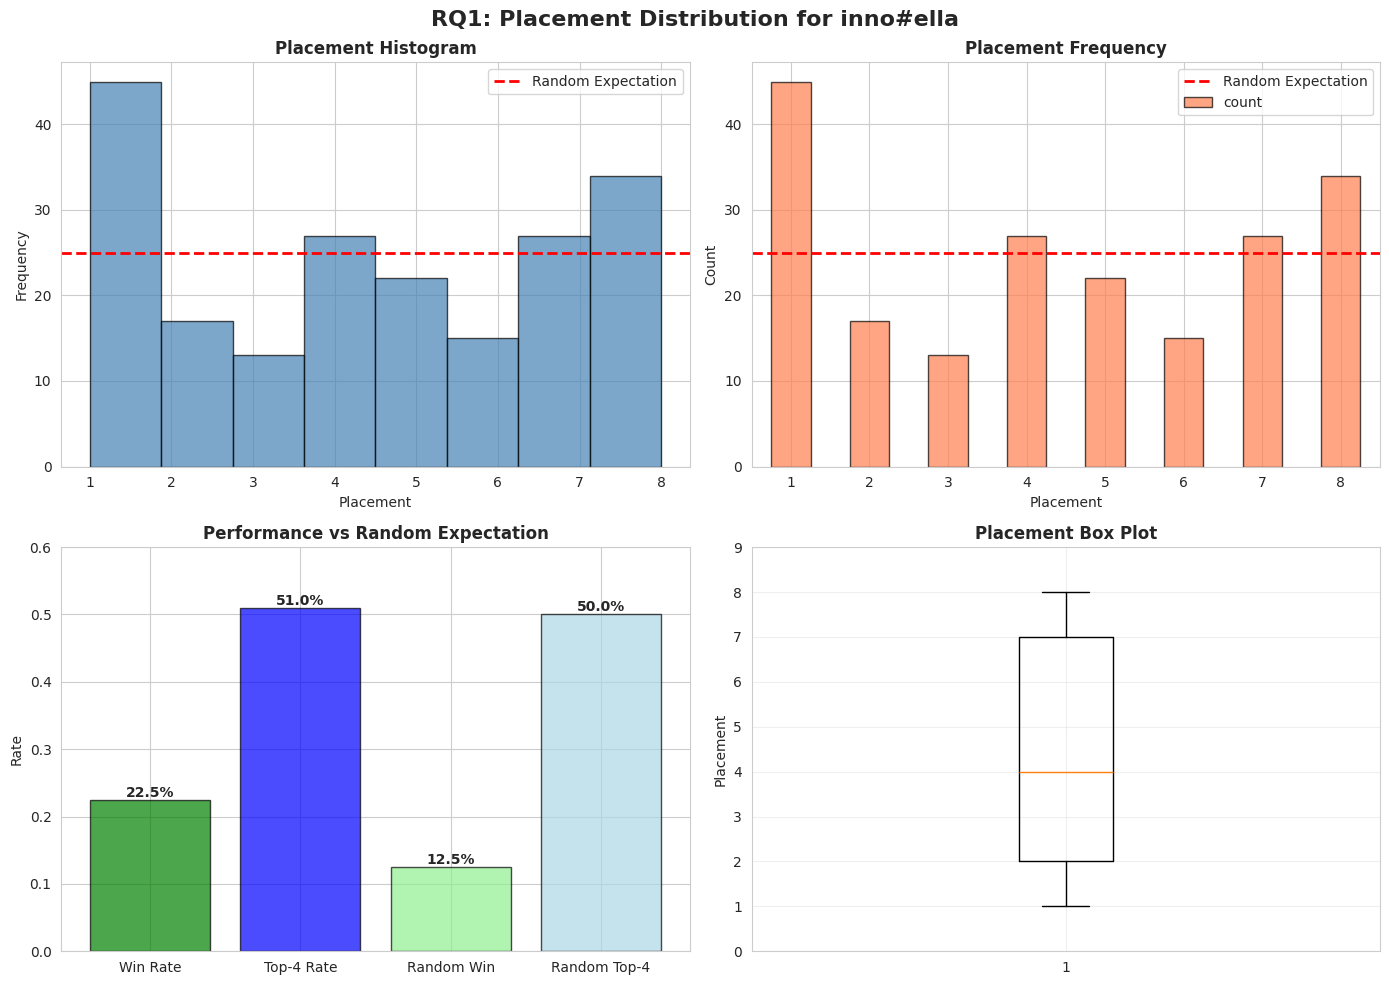

✓ RQ1 plot saved as RQ1.png


In [8]:
# RQ1: Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('RQ1: Placement Distribution for inno#ella', fontsize=16, fontweight='bold')

# Histogram
axes[0, 0].hist(df["placement"], bins=8, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axhline(y=len(df)/8, color='red', linestyle='--', linewidth=2, label='Random Expectation')
axes[0, 0].set_title('Placement Histogram', fontweight='bold')
axes[0, 0].set_xlabel('Placement')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Bar chart
placement_counts.plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axhline(y=len(df)/8, color='red', linestyle='--', linewidth=2, label='Random Expectation')
axes[0, 1].set_title('Placement Frequency', fontweight='bold')
axes[0, 1].set_xlabel('Placement')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()
axes[0, 1].set_xticklabels(range(1, 9), rotation=0)

# Win vs Top-4 rates
outcomes = ['Win Rate', 'Top-4 Rate', 'Random Win', 'Random Top-4']
rates = [df["win"].mean(), df["top4"].mean(), 1/8, 4/8]
colors = ['green', 'blue', 'lightgreen', 'lightblue']
bars = axes[1, 0].bar(outcomes, rates, color=colors, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Performance vs Random Expectation', fontweight='bold')
axes[1, 0].set_ylabel('Rate')
axes[1, 0].set_ylim(0, 0.6)
for bar, rate in zip(bars, rates):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

# Box plot
axes[1, 1].boxplot(df['placement'], vert=True)
axes[1, 1].set_title('Placement Box Plot', fontweight='bold')
axes[1, 1].set_ylabel('Placement')
axes[1, 1].set_ylim(0, 9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('RQ1.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ RQ1 plot saved as RQ1.png")

# RQ2: Trait Associations Analysis

In [9]:
# Parse trait data
trait_list = []

for idx, row in df.iterrows():
    traits = row["traits"].split("; ")
    for t in traits:
        # Extract trait name and remove set prefix
        trait_name = t.split("(")[0]
        if trait_name.startswith("TFT16_"):
            trait_name = trait_name.replace("TFT16_", "")

        trait_list.append({
            "trait": trait_name,
            "top4": row["top4"]
        })

traits_df = pd.DataFrame(trait_list)
print(f"Total trait instances: {len(traits_df)}")
print(f"Unique traits: {traits_df['trait'].nunique()}")

# Filter traits with at least 10 occurrences
trait_counts = traits_df['trait'].value_counts()
traits_filtered = traits_df[traits_df['trait'].isin(trait_counts[trait_counts >= 10].index)].copy()
print(f"Traits with n >= 10: {traits_filtered['trait'].nunique()}")

Total trait instances: 2080
Unique traits: 66
Traits with n >= 10: 36


In [10]:
# RQ2: Chi-square tests for each trait
rq2_results = []

for trait in sorted(traits_filtered['trait'].unique()):
    trait_data = traits_filtered[traits_filtered['trait'] == trait]
    n = len(trait_data)
    top4_count = trait_data['top4'].sum()
    top4_rate = top4_count / n

    # Create contingency table: trait present vs top4 outcome
    contingency = pd.crosstab(traits_filtered['trait'] == trait, traits_filtered['top4'])

    # Chi-square test
    chi2, p_val, dof, expected = chi2_contingency(contingency)

    rq2_results.append({
        'Trait': trait,
        'n': n,
        'Top-4 Rate': f'{top4_rate:.1%}',
        'Chi-Square': f'{chi2:.2f}',
        'p-value': f'{p_val:.4f}',
        'Significant': 'Yes' if p_val < 0.05 else 'No'
    })

rq2_df = pd.DataFrame(rq2_results)
print(f"\nTotal traits tested: {len(rq2_df)}")
print(f"Significant traits (p < 0.05): {(rq2_df['Significant'] == 'Yes').sum()}")
print(f"Non-significant traits: {(rq2_df['Significant'] == 'No').sum()}")


Total traits tested: 36
Significant traits (p < 0.05): 5
Non-significant traits: 31


In [11]:
# RQ2: Display significant traits
sig_traits = rq2_df[rq2_df['Significant'] == 'Yes'].copy()
sig_traits = sig_traits.sort_values('p-value')

print("\nSIGNIFICANT TRAITS (p < 0.05):")
print("="*80)
print(sig_traits.to_string(index=False))

# Display all traits for complete picture
print("\n\nALL TRAITS (Sorted by p-value):")
print("="*80)
rq2_sorted = rq2_df.sort_values('p-value', key=lambda x: x.str.replace('<', '0.000').astype(float))
print(rq2_sorted.to_string(index=False))


SIGNIFICANT TRAITS (p < 0.05):
        Trait  n Top-4 Rate Chi-Square p-value Significant
ShyvanaUnique 62      80.6%      16.95  0.0000         Yes
      Demacia 50      26.0%      15.28  0.0001         Yes
   SylasTrait 66      74.2%      10.23  0.0014         Yes
    DarkChild 38      76.3%       6.75  0.0093         Yes
KindredUnique 10     100.0%       6.74  0.0094         Yes


ALL TRAITS (Sorted by p-value):
            Trait   n Top-4 Rate Chi-Square p-value Significant
    ShyvanaUnique  62      80.6%      16.95  0.0000         Yes
          Demacia  50      26.0%      15.28  0.0001         Yes
       SylasTrait  66      74.2%      10.23  0.0014         Yes
        DarkChild  38      76.3%       6.75  0.0093         Yes
    KindredUnique  10     100.0%       6.74  0.0094         Yes
       Bilgewater  33      36.4%       3.60  0.0578          No
           Slayer  24      33.3%       3.45  0.0632          No
         RuneMage  18      77.8%       3.17  0.0751          No
    

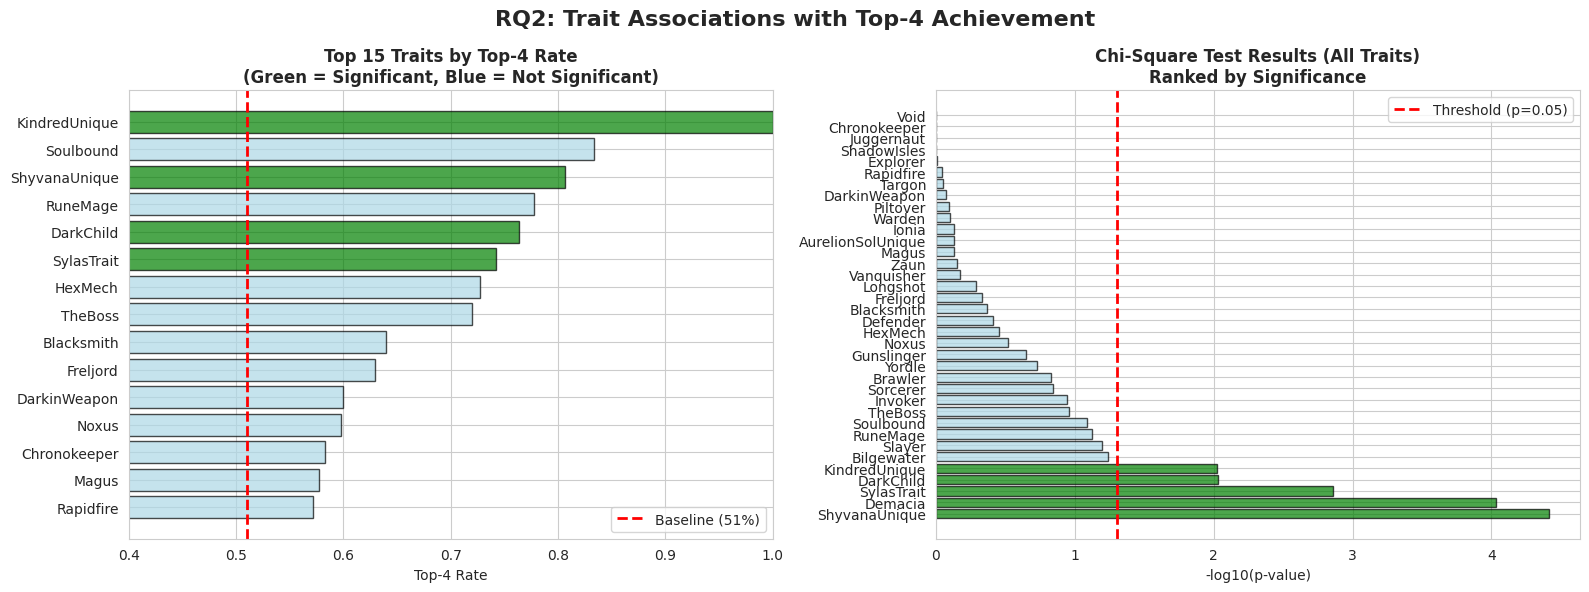

✓ RQ2 plot saved as RQ2.png


In [12]:
# RQ2: Calculate top-4 rates and p-values numerically for plotting
rq2_numeric = []

for trait in sorted(traits_filtered['trait'].unique()):
    trait_data = traits_filtered[traits_filtered['trait'] == trait]
    n = len(trait_data)
    top4_count = trait_data['top4'].sum()
    top4_rate = top4_count / n

    contingency = pd.crosstab(traits_filtered['trait'] == trait, traits_filtered['top4'])
    chi2, p_val, dof, expected = chi2_contingency(contingency)

    rq2_numeric.append({
        'Trait': trait,
        'n': n,
        'Top4Rate': top4_rate,
        'ChiSq': chi2,
        'pvalue': p_val,
        'Significant': p_val < 0.05
    })

rq2_plot_df = pd.DataFrame(rq2_numeric).sort_values('Top4Rate', ascending=False)

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('RQ2: Trait Associations with Top-4 Achievement', fontsize=16, fontweight='bold')

# Top 15 traits by Top-4 rate
top15 = rq2_plot_df.head(15).sort_values('Top4Rate')
colors = ['green' if sig else 'lightblue' for sig in top15['Significant']]
axes[0].barh(top15['Trait'], top15['Top4Rate'], color=colors, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0.51, color='red', linestyle='--', linewidth=2, label='Baseline (51%)')
axes[0].set_xlabel('Top-4 Rate')
axes[0].set_title('Top 15 Traits by Top-4 Rate\n(Green = Significant, Blue = Not Significant)', fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0.4, 1.0)

# Chi-square results (all traits)
rq2_plot_sorted = rq2_plot_df.sort_values('pvalue')
# Convert p-values for log scale (avoid log(0))
log_pvals = [-np.log10(max(p, 0.00001)) for p in rq2_plot_sorted['pvalue']]
colors2 = ['green' if p < 0.05 else 'lightblue' for p in rq2_plot_sorted['pvalue']]
axes[1].barh(rq2_plot_sorted['Trait'], log_pvals, color=colors2, edgecolor='black', alpha=0.7)
axes[1].axvline(x=-np.log10(0.05), color='red', linestyle='--', linewidth=2, label='Threshold (p=0.05)')
axes[1].set_xlabel('-log10(p-value)')
axes[1].set_title('Chi-Square Test Results (All Traits)\nRanked by Significance', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('RQ2.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ RQ2 plot saved as RQ2.png")

In [13]:
# Summary statistics
print("\n" + "="*80)
print("ANALYSIS SUMMARY")
print("="*80)
print(f"\nRQ1: PLACEMENT DISTRIBUTION")
print(f"  Chi-square test: REJECT H0 (p < 0.0001)")
print(f"  Interpretation: Distribution differs significantly from random")
print(f"  Key finding: Bimodal pattern with excessive 1st (22.5%) and 8th (17%) placements")

print(f"\nRQ2: TRAIT ASSOCIATIONS")
print(f"  Total traits tested: {len(rq2_df)}")
print(f"  Significant traits: {(rq2_df['Significant'] == 'Yes').sum()} ({(rq2_df['Significant'] == 'Yes').sum() / len(rq2_df) * 100:.1f}%)")
print(f"  Non-significant traits: {(rq2_df['Significant'] == 'No').sum()} ({(rq2_df['Significant'] == 'No').sum() / len(rq2_df) * 100:.1f}%)")
print(f"\n  Top significant traits:")
for idx, row in sig_traits.head(5).iterrows():
    print(f"    - {row['Trait']}: {row['Top-4 Rate']} (p={row['p-value']})")


ANALYSIS SUMMARY

RQ1: PLACEMENT DISTRIBUTION
  Chi-square test: REJECT H0 (p < 0.0001)
  Interpretation: Distribution differs significantly from random
  Key finding: Bimodal pattern with excessive 1st (22.5%) and 8th (17%) placements

RQ2: TRAIT ASSOCIATIONS
  Total traits tested: 36
  Significant traits: 5 (13.9%)
  Non-significant traits: 31 (86.1%)

  Top significant traits:
    - ShyvanaUnique: 80.6% (p=0.0000)
    - Demacia: 26.0% (p=0.0001)
    - SylasTrait: 74.2% (p=0.0014)
    - DarkChild: 76.3% (p=0.0093)
    - KindredUnique: 100.0% (p=0.0094)
